In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\vijay\Downloads\dataframe_.csv")
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
df.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

In [5]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

input     0
output    0
dtype: int64

<AxesSubplot:xlabel='input', ylabel='Density'>

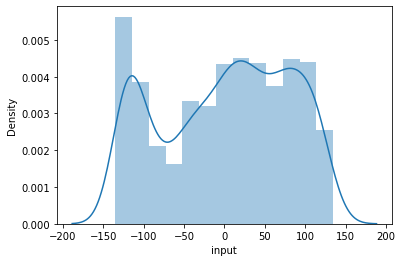

In [8]:
sns.distplot(df.input)

<AxesSubplot:xlabel='output', ylabel='Density'>

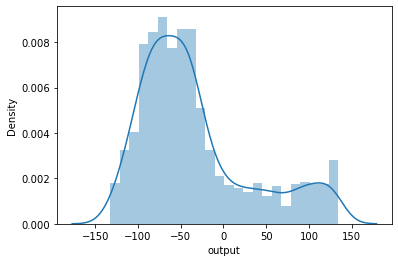

In [9]:
sns.distplot(df.output)

<AxesSubplot:>

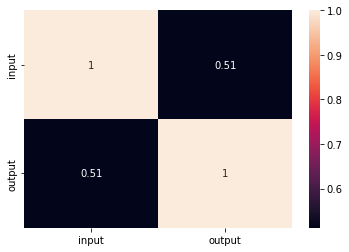

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='input', ylabel='output'>

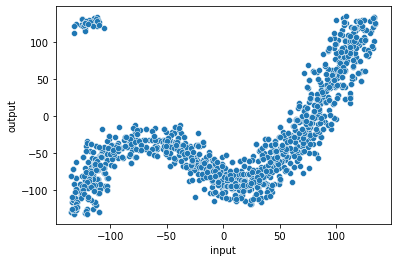

In [11]:
sns.scatterplot(x="input",y="output",data=df)

<AxesSubplot:xlabel='input'>

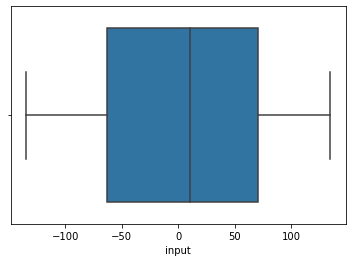

In [12]:
sns.boxplot(df.input)

### Finding outliers

In [13]:
def f1(x):
    ll=df[x].mean()-3*df[x].std()
    ul=df[x].mean()+3*df[x].std()
    return ll,ul

In [14]:
df[(df["input"]<f1("input")[0]) | (df["input"]>f1("input")[1])]

Empty DataFrame
Columns: [input, output]
Index: []

#### There are no outliers

In [15]:
ndf=df.drop(["output"],axis=1)
label=df[["output"]]
ndf.head()

input
0 -122.740667
1 -121.531419
2 -134.917019
3 -120.605951
4 -129.894781

## KNN Model

In [16]:
x_train,x_test,y_train,y_test=train_test_split(ndf,label,train_size=0.7)

In [17]:
x_train

input
149   -42.440286
1456  131.909580
324   105.886607
593    46.734331
1016   88.633331
...          ...
1130 -111.253677
1101 -115.366669
954    25.410184
234    17.633331
598    49.419168

[1187 rows x 1 columns]

In [18]:
knn=KNeighborsRegressor(n_neighbors=3)

In [19]:
model=knn.fit(x_train,y_train)

In [20]:
predicted1=model.predict(x_test)
predicted1

array([[  37.8892672 ],
       [ -36.07865014],
       [-106.024407  ],
       [ -84.95524937],
       [ -57.66535933],
       [ -33.        ],
       [ 126.49668067],
       [ -73.83142178],
       [ -88.66666667],
       [ -80.21872437],
       [ -87.        ],
       [ -57.807599  ],
       [ -78.83769772],
       [ -44.52614288],
       [ -94.63611898],
       [ -87.11404878],
       [ -85.73292003],
       [  66.35266852],
       [-103.29869271],
       [ -83.        ],
       [ -59.2122238 ],
       [-113.99138823],
       [  97.        ],
       [ -98.16463848],
       [ -28.36631472],
       [ -34.03073627],
       [ -92.56006446],
       [ 127.51105657],
       [ -55.2124809 ],
       [   3.45537154],
       [ -96.59335251],
       [ -16.93933087],
       [ -75.2931146 ],
       [ -68.49481965],
       [ -36.07865014],
       [ 114.68043251],
       [ -66.        ],
       [ -76.95099906],
       [ -23.644946  ],
       [  85.78992202],
       [-117.44388277],
       [ -51.466

In [21]:
sklearn.metrics.mean_squared_error(y_test,predicted1)

1372.768726908978

In [22]:
sklearn.metrics.r2_score(y_test,predicted1)

0.6807685136409878

## Linear Regression

In [23]:
lr=LinearRegression()

In [24]:
model=lr.fit(x_train,y_train)

In [25]:
predict=model.predict(x_test)
predict

array([[ 4.28067936e+00],
       [-5.36432553e+01],
       [-2.75074087e+01],
       [-1.58381476e+01],
       [-7.28775790e+01],
       [-5.92954967e+01],
       [ 1.01688833e+01],
       [-3.38077681e+01],
       [-3.23978838e+01],
       [-3.72986688e+01],
       [-8.33403326e+01],
       [-4.55532300e+01],
       [-1.63580777e+01],
       [-6.70822080e+01],
       [-2.25730409e+01],
       [-3.49838576e+01],
       [-2.22093940e+01],
       [ 8.35607526e+00],
       [-2.91483246e+01],
       [-2.62815036e+01],
       [-1.85415377e+01],
       [-8.82476471e+01],
       [ 1.24314712e+01],
       [-8.49704909e+01],
       [-5.83244820e+01],
       [-4.83566445e+00],
       [-2.34320128e+01],
       [ 2.11014849e+01],
       [-4.74768486e+01],
       [ 6.55309308e+00],
       [-2.55872589e+01],
       [-4.52806392e+00],
       [-3.27500283e+01],
       [-7.77881752e+01],
       [-5.34851099e+01],
       [ 1.08013128e+01],
       [-4.19506592e+01],
       [-3.63218965e+01],
       [-1.2

In [26]:
mean_squared_error(y_test,predict)

2981.7404986737206

In [27]:
mean_absolute_error(y_test,predict)

42.64458119271031

In [28]:
r2_score(y_test,predict)

0.30660902111912114